## Weather Forecasting: Predict meteorological events using time series data.


Weather forecasting is critical for agriculture, transportation, disaster management, and daily planning.

### Objectives

1.Understand time series data analysis.

2.Use ARIMA and Prophet to forecast weather parameters.

3.Evaluate model accuracy.

4.Highlight ARIMA's and Prophet difference in weather forecasting.

This project demonstrates how innovative data science techniques can improve weather predictions, benefiting various sectors and society as a whole

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##library related to ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


This is a link of our dataset that we are using in the project:
https://www.kaggle.com/datasets/zusmani/rainfall-in-pakistan

In [ ]:
## Reading the dataset for weather Forcasting ,and  the name of dataset is Rainfall_1901_2016.csv

weather_df = pd.read_csv('/content/Rainfall_1901_2016.csv')
weather_df.head(12)

,Rainfall - (MM),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
5,12.88130,1901,June
6,68.09300,1901,July
7,16.58360,1901,August
8,13.33910,1901,September
9,3.10757,1901,October


Let's have a look at input variables

1.Rainfall - (MM): This column represents the amount of rainfall recorded in millimeters for each month. It provides information about the precipitation levels during that specific month.

2.Year: This column indicates the year in which the rainfall data was recorded. In this case, all the data points belong to the year 1901.

3.Month: This column specifies the month for which the rainfall data is recorded.
It provides information about the time period during which the rainfall occurred.


In [ ]:
##Dispaly all column of dataset
weather_df.columns

Index(['Rainfall - (MM)', ' Year', 'Month'], dtype='object')

In [ ]:
# Check information about the DataFrame
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall - (MM)  1392 non-null   float64
 1    Year            1392 non-null   int64  
 2   Month            1392 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 32.8+ KB


In [ ]:
## statistical analysis to check distribution of numerical columns
weather_df.describe()

,Rainfall - (MM),Year
count,1392.000000,1392.000000
mean,25.142392,1958.500000
std,22.239632,33.497105
min,0.105840,1901.000000
25%,9.586635,1929.750000
50%,19.653750,1958.500000
75%,33.753075,1987.250000
max,154.055000,2016.000000


from the above description we can see the maximum rainfall=154.055mm(Heavy Rain),minimum rainfall=0.1058mm

### Data Preprocessing:

In this step we are prepare and preprocess the data.It also involve cleaning, quality control, and formatting data for use in your forecasting model.

In [ ]:
## no of year
weather_df[' Year'].nunique()

116

In [ ]:
## removing whitespase from columns and rename a colummns
weather_df = weather_df.rename(columns={'Rainfall - (MM)':'Rainfall-(mm)',' Year':'Year'})
print("Shape of DataFrame",weather_df.shape)
weather_df.head(12)

Shape of DataFrame (1392, 3)


,Rainfall-(mm),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
5,12.88130,1901,June
6,68.09300,1901,July
7,16.58360,1901,August
8,13.33910,1901,September
9,3.10757,1901,October


In [ ]:
# Calculate the count of missing values for each column

weather_df.isnull().sum()

Rainfall-(mm)    0
Year             0
Month            0
dtype: int64

The weather DataFrame (weather_df) has no missing values for the "Rainfall-(mm)," "Year," and "Month" columns.

In [ ]:
##copying the dataset
df=weather_df.copy()

#Convert the Year and Month columns to a datetime index
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')
df.set_index('Date', inplace=True)


### Exploratory data Analysis and Visualization
EDA help to understand the characteristics of the weather data. This includes visualizing time series patterns, identifying trends, and detecting seasonality.

These initial steps serve as the foundation for making informed decisions throughout the project, ultimately enhancing the accuracy of your weather predictions.


In [ ]:
## calculate average rainfall in each year
df_yearly= df.groupby('Year')['Rainfall-(mm)'].mean()
df_yearly.head(10)

Year
1901    20.694421
1902    14.635436
1903    23.015417
1904    21.827631
1905    21.601424
1906    23.352663
1907    21.532768
1908    33.230170
1909    31.117383
1910    26.077557
Name: Rainfall-(mm), dtype: float64

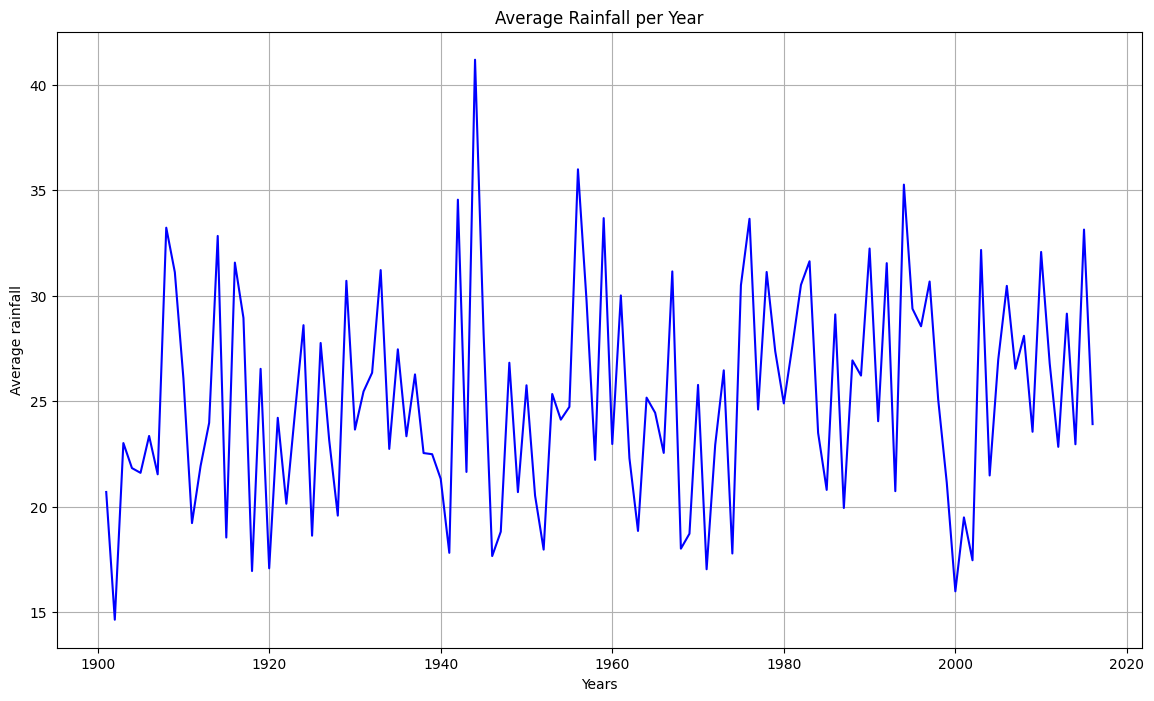

In [ ]:
##plot year vs average rainfall
plt.figure(figsize=(14, 8))
plt.plot(df.groupby(['Year']).mean(),color='blue')
plt.xlabel('Years')
plt.ylabel('Average rainfall')
plt.title("Average Rainfall per Year")
plt.grid(True)
plt.show()

The highest rainfall year is 1944

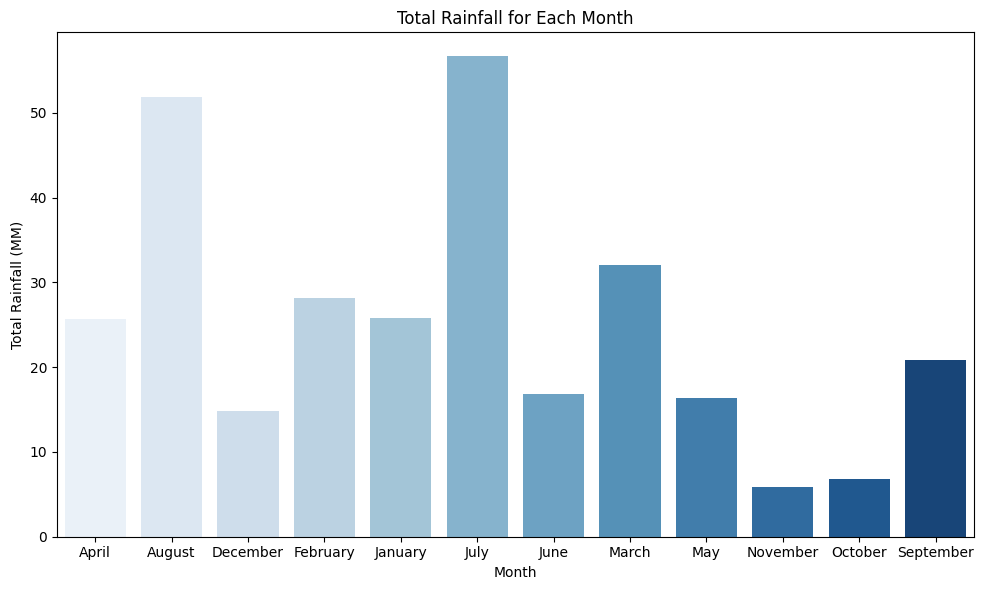

In [ ]:
# Group by 'Month' and calculate mean
df_month=df.groupby('Month')['Rainfall-(mm)'].mean()
# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=df_month.index, y=df_month.values, palette="Blues")

plt.xlabel('Month')
plt.ylabel('Total Rainfall (MM)')
plt.title('Total Rainfall for Each Month')

plt.tight_layout()
plt.show()

Plotly Express is a powerful library for creating interactive visualizations with minimal code. It provides a high-level interface for creating various types of plots, including scatter plots, line plots, bar charts, and more. It simplifies the process of creating visually appealing and interactive plots by automatically handling many of the underlying details.

In [ ]:
##plotting the year vs rainfall (which also denote month in it )
import plotly.express as px
plt.figure(figsize=(45,30))
graph=px.bar(df,x="Year",y="Rainfall-(mm)",hover_name='Month',color='Month',title='Rainfall During 2000 to 2016')
graph.show()

<Figure size 4500x3000 with 0 Axes>


### Time series

This helps in understanding the underlying patterns in the data.

Let's see how plot for all year's and rainfall looks

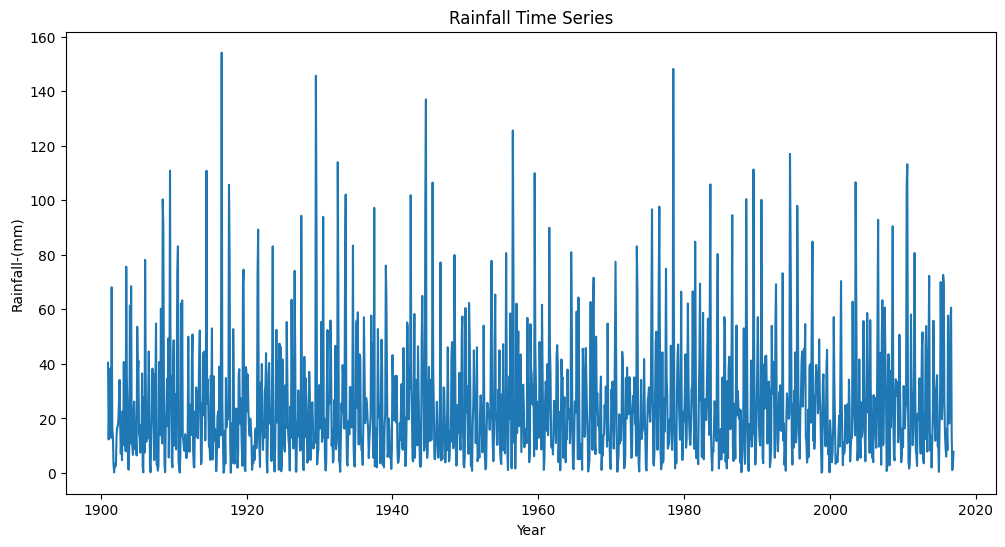

In [ ]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Rainfall-(mm)'])
plt.title('Rainfall Time Series')
plt.xlabel('Year')
plt.ylabel('Rainfall-(mm)')
plt.show()

By tha above graph we cannot see the time series data properly ,so now consider the some year and visualize the time series

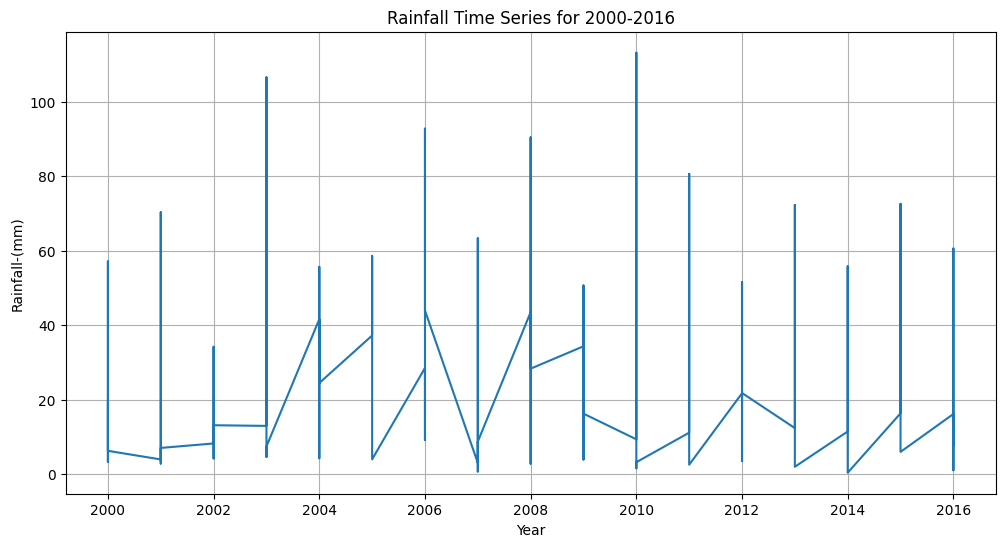

In [ ]:
# Filter the DataFrame for the specified range of years
subset_df = df[(df['Year'] >=2000) & (df['Year'] <= 2016)]

# Plot the data for the specified range of years
plt.figure(figsize=(12, 6))
plt.plot(subset_df['Year'], subset_df['Rainfall-(mm)'])
plt.title('Rainfall Time Series for 2000-2016')
plt.xlabel('Year')
plt.ylabel('Rainfall-(mm)')
plt.grid(True)  # Add gridlines for better visualization
plt.show()

###ARIMA Model

Autoregressive (AR): Autoregressive refers to a model that predicts future values based on past values of the same variable. In an ARIMA model, the current value of a variable is assumed to be linearly dependent on its previous values.

Integrated (I): Integrated refers to the process of differencing the time series data to make it stationary. Stationarity is an important assumption in time series analysis, and differencing helps remove trends and seasonality from the data.

Moving Average (MA): Moving Average refers to a model that predicts future values based on the average of past values. In an ARIMA model, the current value of a variable is assumed to be linearly dependent on the error terms from previous predictions.

Auto ARIMA (AutoRegressive Integrated Moving Average) is a popular algorithm used in time series analysis and forecasting. It is a variation of the ARIMA model that automatically selects the optimal parameters for the model based on the data.

##### Check Stationarity

So above plots shows that we do have seasonality but there is no trend. Let's check for below necessary conditions:

Constant mean

Constant variance

An auto co-variance that does not depend on time

In [ ]:
# Check if the time series is stationary
# Augmented Dickey–Fuller test for checking stationaryity
def test_stationarity(ts):
    # Perform Dickey-Fuller test
    result = adfuller(ts)
    p_value = result[1]

    print('1.ADF Statistic:',result[0],'\n')
    print('2.Critical Values:' ,result[4],'\n')
    print('3.p-value: ',p_value,'\n')

    if p_value <= 0.05:
        print("Data is stationary ")
    else:
        print("Data is non-stationary, Differencing is needed")

The output of the function includes three parts:

ADF Statistic: It measures the strength of the evidence against the null hypothesis of non-stationarity. A more negative (lower) ADF statistic suggests stronger evidence for stationarity.

Critical Values: These are the critical values at different significance levels. If the ADF statistic is less than the critical value, we can reject the null hypothesis and conclude that the data is stationary.

p-value: This is the probability of obtaining the observed ADF statistic under the null hypothesis of non-stationarity. If the p-value is less than or equal to a chosen significance level (commonly 0.05), we can reject the null hypothesis and conclude that the data is stationary.

Based on the p-value, the function then prints whether the data is stationary or non-stationary. If the p-value is less than or equal to 0.05, it indicates that the data is stationary. Otherwise,it show non stationary ,Differencing needed

In [ ]:
##calling of test_stationary functon
test_stationarity(df['Rainfall-(mm)'])


1.ADF Statistic: -6.695889008362755 

2.Critical Values: {'1%': -3.435139190725917, '5%': -2.8636550704859007, '10%': -2.5678960623995417} 

3.p-value:  4.000735413148449e-09 

Data is stationary 


As we are working on univariate time series and Data is also stationary.So we can apply Arima model.

#### Splitting data into Training ans Testing dataset

In [ ]:
# split the data  into train and test sets
training_size=int(len(df)*0.90)##taking 90% for training
test_size=len(df)-training_size##taking 10% for testing

train = df.iloc[0:training_size, :]## row data,all column
test = df.iloc[training_size:len(df), :]## remaining row,all columns


train_df = train['Rainfall-(mm)']
test_df = test['Rainfall-(mm)']

In [ ]:
print(train_df.shape)
print(test_df)

(1252,)
Date
2005-05-01    27.80630
2005-06-01     7.38339
2005-07-01    56.05090
2005-08-01    27.62180
2005-09-01    28.37870
                ...   
2016-08-01    60.60610
2016-09-01    13.76940
2016-10-01     1.07552
2016-11-01     2.88480
2016-12-01     7.82298
Name: Rainfall-(mm), Length: 140, dtype: float64


#### Model Identification

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.7 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

# Fit the auto_arima model
arima_model=auto_arima(train_df, start_p=0, start_q=0,max_p=3, max_q=3, m=12,start_P=0,start_Q=0,max_P=1,max_Q=1, seasonal=True,d=0, D=1, trace=True,error_action='ignore',suppress_warnings=True)
## Print the summary of the ARIMA model
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11329.894, Time=0.28 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10964.788, Time=3.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=11327.903, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=11318.676, Time=0.42 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.70 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=7.35 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=10970.745, Time=7.35 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=10966.573, Time=9.53 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=10966.244, Time=19.20 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=10964.602, Time=10.10 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=11317.821, Time=1.27 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=6.70 sec
 ARIMA(0,0,2)(1,1,0)[12] intercept   : AIC=10966.477, Time=5.46 sec
 ARIMA(1,0,2)(1,1,0)[12] in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1252
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood               -5478.324
Date:                             Wed, 20 Sep 2023   AIC                          10962.648
Time:                                     17:01:16   BIC                          10978.016
Sample:                                 01-01-1901   HQIC                         10968.427
                                      - 04-01-2005                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0821      0.025      3.277      0.001       0.033       0.131
ar.S.L12      -0.5026      0.017    -28.965      0.000      -0.537      -0.469
sigma2       401.5413      8.720     46.049      0.000     384.451     418.632
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1262.23
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Model Fitting

In [ ]:
##fitting model on train dataset
arima_model=arima_model.fit(train_df)

 This a graph that shows the predicted values and the actual values. By comparing the two, we can assess the accuracy of the ARIMA model's predictions. If the predicted values closely match the actual values, it indicates that the model is performing well.

2005-05-01    16.271314
2005-06-01    16.583471
2005-07-01    65.356888
2005-08-01    61.854705
2005-09-01    20.591804
                ...    
2016-08-01    59.790532
2016-09-01    18.774852
2016-10-01    10.486845
2016-11-01     5.855011
2016-12-01    18.799131
Freq: MS, Length: 140, dtype: float64


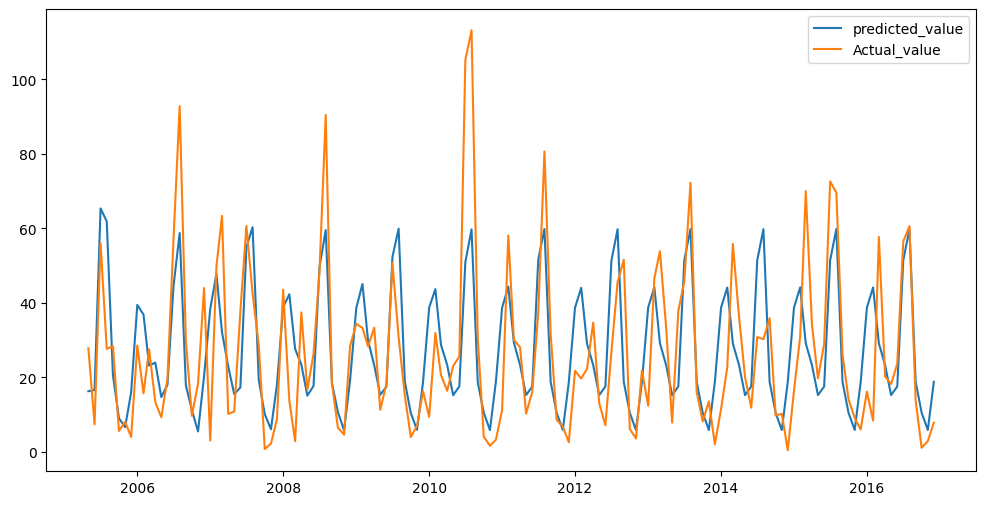

In [ ]:
pred = arima_model.predict(len(test))
print(pred)
# Plotting pred

plt.figure(figsize=(12,6))
plt.plot(pred, label='predicted_value')

# Plotting test_df
plt.plot(test_df, label='Actual_value')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

#### ARIMA Model Evalution

The R-squared value will tell you how well the model fits the data, with a higher value indicating a better fit. The MSE and RMSE values provide information about the average magnitude of the errors made by the model. Lower values of MSE and RMSE indicate better model performance, as they represent smaller errors between the predicted and actual values.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
actual_values=test_df

# Calculate R-squared (R2) score
r2 = r2_score(actual_values, pred)

# Calculate Mean Absolute Error (MAE)
mse = mean_squared_error(actual_values, pred)

# Calculate Mean Squared Error (MSE)
rmse = np.sqrt(mse)

print("R-squared = ",r2)
print("Mean Squared Error (MSE) = ",mse)
print("Root Mean Squared Error (RMSE) = ",rmse)




R-squared =  0.4585002776152265
Mean Squared Error (MSE) =  268.068952397585
Root Mean Squared Error (RMSE) =  16.372811377328727


The ARIMA gives us the accuracy of 45%

Then we will now try Prophet and see what accuracy we will get from it


### Prophet Model

The Prophet model is a forecasting model developed by Facebook's Core Data Science team. It is designed to handle time series data with strong seasonality and multiple underlying trends. The Prophet model is widely used for forecasting various types of data, including business metrics, weather patterns, and economic indicators.

The 'train' DataFrame is then reset to have a new index using the reset_index() method. This is done to ensure that the 'ds' column, which represents the date, is in the correct format for the Prophet model.

The column names in the 'train' DataFrame are renamed using the rename() method. The 'Date' column is renamed as 'ds', and the 'Rainfall-(mm)' column is renamed as 'y'. This step is necessary as the Prophet model expects the input columns to have specific names.

In [ ]:
from prophet import Prophet

# Check if 'level_0' column exists and drop it if it does
if 'level_0' in train.columns:
    train.drop(columns=['level_0'], inplace=True)

# Prepare the training data
train.reset_index(inplace=True)
train.rename(columns={'Date': 'ds', 'Rainfall-(mm)': 'y'}, inplace=True)

# create and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8qqwz1w/oxnr2wsa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8qqwz1w/lhysin4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6552', 'data', 'file=/tmp/tmpb8qqwz1w/oxnr2wsa.json', 'init=/tmp/tmpb8qqwz1w/lhysin4s.json', 'output', 'file=/tmp/tmpb8qqwz1w/prophet_modelorhdbnpf/prophet_model-20230920170117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


The Predicted Value:
            ds       yhat
0   2005-05-01  17.058505
1   2005-06-01  17.460132
2   2005-07-01  59.259927
3   2005-08-01  51.613445
4   2005-09-01  20.664207
..         ...        ...
135 2016-08-01  51.772771
136 2016-09-01  19.818057
137 2016-10-01   7.227447
138 2016-11-01   6.786025
139 2016-12-01  18.608982

[140 rows x 2 columns]


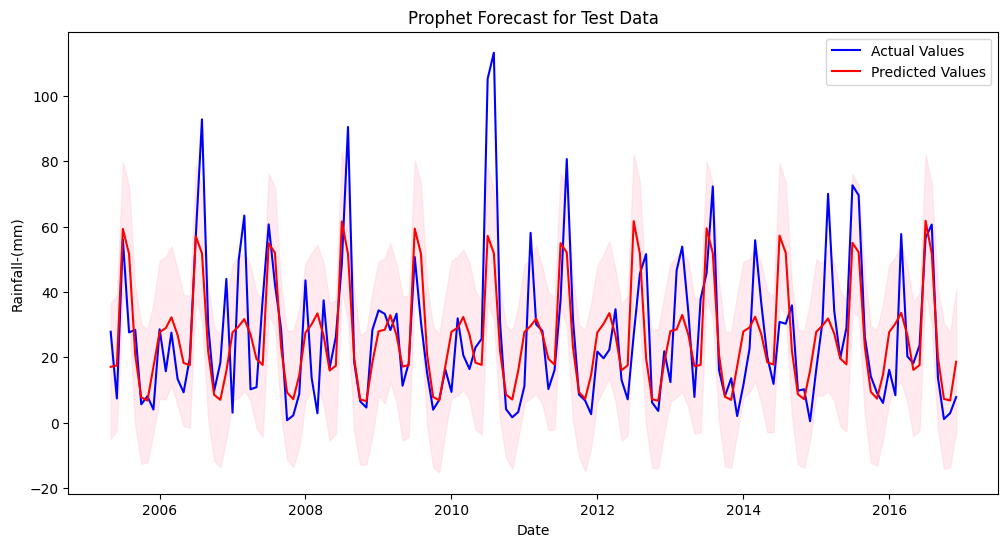

In [ ]:
# Prepare the testing data
test.reset_index(inplace=True)
test.rename(columns={'Date': 'ds', 'Rainfall-(mm)': 'y'}, inplace=True)

# Make predictions on the testing data
forecast = prophet_model.predict(test)

##print the forecasted value
print('The Predicted Value:')
print(forecast[['ds','yhat']])

# Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual Values', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Values', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.title('Prophet Forecast for Test Data')
plt.xlabel('Date')
plt.ylabel('Rainfall-(mm)')
plt.legend()
plt.show()


The graph showing the actual values of rainfall in blue and the predicted values in red.

The shaded pink area represents the uncertainty or confidence interval of the predictions.

This graph allows us to visually compare the predicted values with the actual values and assess the accuracy of the predictions made by the Prophet model.


#### Prophet Model Evalution

In [ ]:
# Calculate R-squared (R2) score
r2 = r2_score( test['y'].values,forecast['yhat'].values)
print("R-squared (R2) score:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error( test['y'].values, forecast['yhat'].values)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R2) score: 0.5262783936951092
Mean Squared Error (MSE): 234.51545675958437
Root Mean Squared Error (RMSE): 15.31389750388791


The Prophet Model has a accuracy of around 52%

Conclusion: Thus as we can see in case of our dataset the better model to use is Prophet as it gives us better accuracy than ARIMA model, so we are taking Prophet model for forecasting the rain for next year(2017).

### Forcasting the Rainfall for next year (2017)

In [ ]:
# Define a DataFrame covering the year 2017
year_2017_dates = pd.date_range(start='2017-01-01', end='2017-12-31', freq='MS')
future_2017 = pd.DataFrame({'ds': year_2017_dates})

# Use the fitted Prophet model to make predictions for the year 2017
forecast_2017 = prophet_model.predict(future_2017)

# Print the predictions for the year 2017
print(forecast_2017[['ds', 'yhat']])

           ds       yhat
0  2017-01-01  28.106729
1  2017-02-01  28.614224
2  2017-03-01  33.046780
3  2017-04-01  26.900392
4  2017-05-01  17.333166
5  2017-06-01  17.734793
6  2017-07-01  59.534588
7  2017-08-01  51.888106
8  2017-09-01  20.938868
9  2017-10-01   7.996367
10 2017-11-01   7.034186
11 2017-12-01  17.332217


In the above code We have forecasted the rainfall for next 1 year on the bases of our trained model.

##Project END